<a href="https://colab.research.google.com/github/krishna663-wq/Machine_Learning/blob/main/boston_HousePrediction_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score,mean_squared_error

In [21]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
data.shape

(506, 14)

<Axes: >

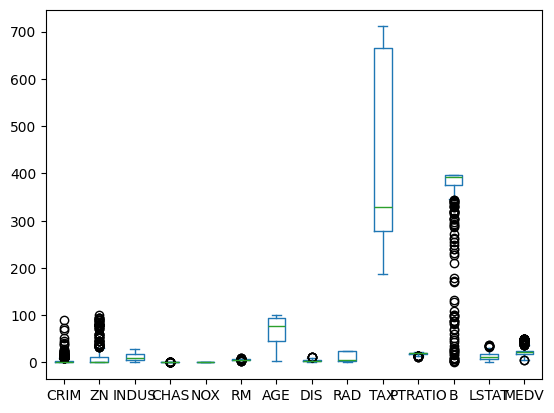

In [23]:
data.plot(kind='box')

In [25]:
def remove_outliers(df, outlier_columns): # Added outlier_columns as an argument
  for column in outlier_columns: # Iterating through outlier_columns instead of all columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] # Modified data to df for consistency
  return df # Returning the modified DataFrame

outlier_columns = ['CRIM','ZN','B']

data = remove_outliers(data,outlier_columns) # Calling with both arguments

<Axes: >

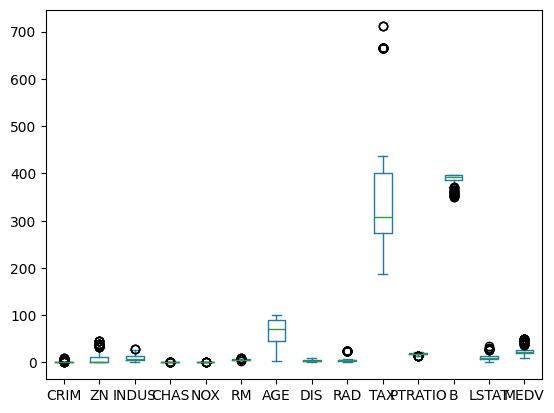

In [27]:
data.plot(kind='box')

In [28]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.243634,0.531005,0.109287,0.637160,-0.112667,0.373570,-0.400191,0.892477,0.813393,0.257747,-0.177337,0.273593,-0.163501
ZN,-0.243634,1.000000,-0.417878,-0.010082,-0.381395,0.250029,-0.393923,0.482503,-0.168678,-0.245145,-0.370850,0.067525,-0.307860,0.252722
INDUS,0.531005,-0.417878,1.000000,0.093070,0.659818,-0.297712,0.478459,-0.563946,0.442914,0.632446,0.322721,-0.193213,0.473384,-0.320966
CHAS,0.109287,-0.010082,0.093070,1.000000,0.103061,0.102196,0.123812,-0.126438,0.119967,0.053895,-0.064845,-0.063045,0.023607,0.148810
NOX,0.637160,-0.381395,0.659818,0.103061,1.000000,-0.170768,0.644153,-0.715450,0.504246,0.592010,0.045647,-0.225940,0.454040,-0.196506
RM,-0.112667,0.250029,-0.297712,0.102196,-0.170768,1.000000,-0.085957,0.032051,-0.047436,-0.158329,-0.331007,0.010153,-0.623414,0.766863
AGE,0.373570,-0.393923,0.478459,0.123812,0.644153,-0.085957,1.000000,-0.649524,0.253132,0.338660,0.116023,-0.108647,0.512614,-0.177150
DIS,-0.400191,0.482503,-0.563946,-0.126438,-0.715450,0.032051,-0.649524,1.000000,-0.289044,-0.389371,-0.062271,0.096522,-0.293468,-0.007156
RAD,0.892477,-0.168678,0.442914,0.119967,0.504246,-0.047436,0.253132,-0.289044,1.000000,0.854766,0.300794,-0.175298,0.137549,-0.089399
TAX,0.813393,-0.245145,0.632446,0.053895,0.592010,-0.158329,0.338660,-0.389371,0.854766,1.000000,0.346035,-0.173936,0.259100,-0.229594


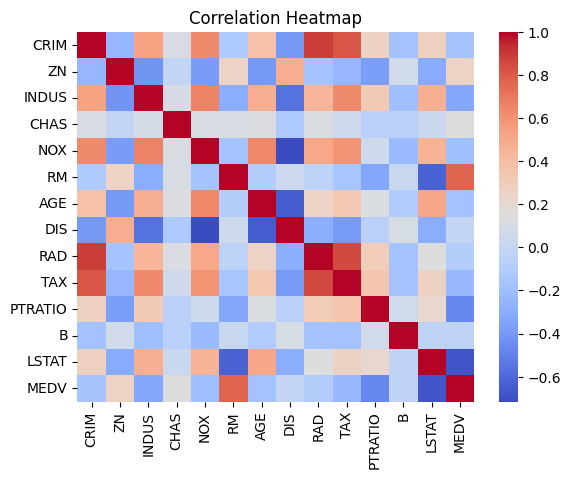

In [29]:
sns.heatmap(data.corr(),annot=False,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
correlation = data.corr()['MEDV'].sort_values(ascending=False)
relevant_features = correlation[abs(correlation) > 0.3].index.tolist()
print("Selected features based on correlation:\n",relevant_features)


Selected features based on correlation:
 ['MEDV', 'RM', 'INDUS', 'PTRATIO', 'LSTAT']


In [33]:
y = data['MEDV']
data[relevant_features].drop('MEDV',axis=1,inplace=True)
X = data[relevant_features]

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)